In [2]:
from cdlib import algorithms
import networkx as nx

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'wurlitzer', 'bayanpy', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [3]:
graph = nx.read_graphml("../../data/graph_full.graphml")

In [4]:
import time
graph = nx.read_graphml("../../data/graph_full.graphml")
for node in graph.nodes:
    if "begin_date" in graph.nodes[node].keys():
        graph.nodes[node]["begin_date"] = time.ctime(graph.nodes[node]["begin_date"])

In [5]:
for node in graph.nodes:
    print(node)
    break

202101010004


In [6]:
coms = algorithms.louvain(graph, weight='')

In [7]:
len(graph.nodes)

5572

In [8]:
important_comm = [comm for comm in coms.communities if len(comm) > 10]


In [9]:
len(important_comm)

16

In [10]:
def get_node_community(node_id, coms):
    for i, com in enumerate(coms):
        if node_id in com:
            return i
    return None

In [11]:
# for each node add as a feature the community it belongs to
for node in graph.nodes:
    community = get_node_community(node, important_comm)
    if (community is not None):
        graph.nodes[node]['community'] = get_node_community(node, important_comm)
    else : 
        graph.nodes[node]['community'] = -1

In [12]:
graph.nodes['202101010004']

{'begin_date': 'Fri Jan  1 01:00:00 2021',
 'end_date': 1609459200.0,
 'latitude': 31.016779,
 'longitude': 33.008587,
 'crit1': 1,
 'crit2': 1,
 'crit3': 0,
 'targsubtype1_txt': 'Military Transportation/Vehicle (excluding convoys)',
 'gname': 'Unknown',
 'country_txt': 'Egypt',
 'success': 1,
 'weapon_biological': 0,
 'weapon_chemical': 0,
 'weapon_radiological': 0,
 'weapon_nuclear': 0,
 'weapon_firearms': 0,
 'weapon_explosives': 1,
 'weapon_fake weapons': 0,
 'weapon_incendiary': 0,
 'weapon_melee': 0,
 'weapon_vehicle': 0,
 'weapon_sabotage equipment': 0,
 'weapon_other': 0,
 'weapon_unknown': 0,
 'attack_assassination': 0,
 'attack_armed assault': 0,
 'attack_bombing/explosion': 1,
 'attack_hijacking': 0,
 'attack_hostage taking (barricade incident)': 0,
 'attack_hostage taking (kidnapping)': 0,
 'attack_facility/infrastructure attack': 0,
 'attack_unarmed assault': 0,
 'attack_unknown': 0,
 'target_business': 0,
 'target_government (general)': 0,
 'target_police': 0,
 'target_mi

In [13]:
# create a sub graph with only the nodes in the important communities
sub_graph = graph.subgraph([node for node in graph.nodes if graph.nodes[node]['community'] == 1])

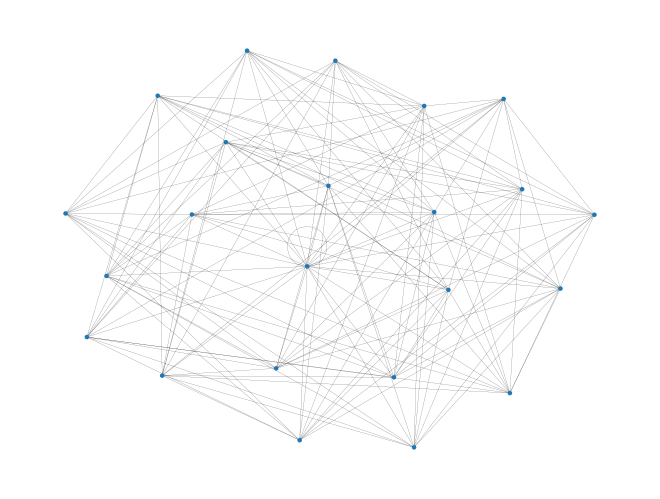

In [14]:
nx.draw(sub_graph, node_size=5, width=0.1, edge_color='black', node_color=[graph.nodes[node]['community'] for node in sub_graph.nodes], cmap='tab20')

In [15]:
# print the feature of the nodes
for node in sub_graph.nodes:
    print(sub_graph.nodes[node])

{'begin_date': 'Sun Jun  6 02:00:00 2021', 'end_date': 1622937600.0, 'latitude': 25.912778, 'longitude': -109.162536, 'crit1': 1, 'crit2': 1, 'crit3': 1, 'targsubtype1_txt': 'Election-related', 'gname': 'Unknown', 'country_txt': 'Mexico', 'success': 1, 'weapon_biological': 0, 'weapon_chemical': 0, 'weapon_radiological': 0, 'weapon_nuclear': 0, 'weapon_firearms': 1, 'weapon_explosives': 0, 'weapon_fake weapons': 0, 'weapon_incendiary': 0, 'weapon_melee': 0, 'weapon_vehicle': 0, 'weapon_sabotage equipment': 0, 'weapon_other': 0, 'weapon_unknown': 0, 'attack_assassination': 0, 'attack_armed assault': 0, 'attack_bombing/explosion': 0, 'attack_hijacking': 0, 'attack_hostage taking (barricade incident)': 0, 'attack_hostage taking (kidnapping)': 0, 'attack_facility/infrastructure attack': 1, 'attack_unarmed assault': 0, 'attack_unknown': 0, 'target_business': 0, 'target_government (general)': 1, 'target_police': 0, 'target_military': 0, 'target_abortion related': 0, 'target_airports & aircraf

In [ ]:
# propose une façon de visualiser les communautés

